# MACHINE LEARNING

## SUMMARY
### 1. Cargar librerias
### 2. Cargar dataset limpios
### 3. Tranformacion y Feature Engineering
### 4. Modelos Regresion
### 5. Modelos Clasificacion
### 6. Sharks and Dragons Algorithm
### 7. Algoirtmo unico

#### 1. Cargar librerias

In [5]:
#IMPORTAMOS LIBRERIAS GENERALES
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [6]:
#LIBRERIAS UTILIZADAS PARA MACHINE LEARNING

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
import sklearn 
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import phik
#import xgboost
from sklearn.feature_selection import SelectKBest, chi2
import tensorflow as tf
from tensorflow import keras

from numpy import array
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from numpy import mean
from numpy import absolute
import warnings
warnings.filterwarnings("ignore")


#### 2. Cargar dataset limpios

In [7]:
#IMPORTAMOS EL CSV investmentVC
df_clean = pd.read_csv('../data/processed/startup_funding_df_clean.csv')

#IMPORTAMOS EL CSV sharks and dragons
df_sharks_and_dragons = pd.read_csv('../data/processed/sharks_and_dragons_dataset.csv') 
df_sharks_and_dragons.drop(columns= ['Unnamed: 0'], inplace= True)

In [8]:
#Modificamos la variable status a valores numericos que ayuden a predecir al dividirla en 3 clases
print(df_clean['status'].unique())
dicc_status = {
    'operating': 1, 
    'acquired': 2, 
    'closed': 0
}

df_clean['status'] = df_clean['status'].map(dicc_status)

['operating' 'acquired' 'closed']


In [9]:
#COMPROBAMOS LOS VALORES MINIMOS DE LAS ESPERANZAS MATEMATICAS
print(df_clean['math_expectation_market'].min()) #OUTPUT: -100
print(df_clean['math_expectation_country'].min()) #OUTPUT: -100

#SUMAMOS 100 A AMBAS PARA QUE EL MINIMO SEA 0 Y NO UN VALOR NEGATIVO Y ASI PODER USAR SELECTKBEST MAS ADELANTE
df_clean['math_expectation_market'] = df_clean['math_expectation_market'] +100
df_clean['math_expectation_country'] = df_clean['math_expectation_country'] +100

#COMPROBAMOS QUE AHORA NO HAY VALORES NEGATIVOS
print(df_clean['math_expectation_market'].min())
df_clean['math_expectation_country'].min()

-100.0
-100.0
0.0


0.0

In [10]:
#DEFINIMOS VARIABLES
#DEFINIMOS UNA QUE CONTENGA TODAS LAS VARIABLES, CATEGORICAS Y NUMERICAS
X_todo_cat_num = df_clean[['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter',
       'founded_year', 'first_funding_at', 'last_funding_at', 'seed',
       'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'funding_total', 'from_founding_to_funding',
       'from_first_to_last_funding', 'from_founding_to_last_funding',
       'math_expectation_market', 'math_expectation_country']]

#DEFINIMOS X e y
#ELIMINAMOS DE LA X LA COLUMNA DE VENTURE PORQUE TIENE DEMASIADA CORRELACION CON NUESTRO TARGET.
#VENTURE ES LA INVERSION DE VENTURE CAPITALS (GRUPOS DE INVERSION) QUE ES EN PARTE LO QUE QUEREMOS PREDECIR
#ELIMINAMOS DESDE LA ROUND_C EN ADELANTE PORQUE LA SUMA DE TODOS LOS ROUNDS = TARGET (y)
X = df_clean[['status',
       'funding_rounds', 'founded_year', 'seed',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'from_founding_to_funding',
       'from_first_to_last_funding', 'from_founding_to_last_funding','math_expectation_market',
       'math_expectation_country']]
y = df_clean['venture']

#FIJAMOS UNA SEMILLA PARA PODER USARLA SIEMPRE CON EL MISMO VALOR MAS ADELANTE
seed = 42
size = 0.2

#SEPARAMOS X E y EN TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= size, random_state=seed)

### 3. Tranformacion y Feature Engineering

#### 3.1 Estandarizacion de las variables

In [11]:
print('SHAPES')
print('X shape', X.shape)
print('X train shape', X_train.shape)
print('X test shape', X_test.shape)
print('y shape', y.shape)
print('y train shape', y_train.shape)
print('y test shape', y_test.shape, '\n')

SHAPES
X shape (19599, 20)
X train shape (15679, 20)
X test shape (3920, 20)
y shape (19599,)
y train shape (15679,)
y test shape (3920,) 



In [12]:
#ESTANDARIZAMOS LOS DATOS NUMERICOS
scale = StandardScaler()

df_transformed = scale.fit_transform(X_train, y_train)
X_test_transformed = scale.transform(X_test)

y_train_trans = y_train
#y_test_trans = scale.transform(y_test)
df_transformed =pd.DataFrame(df_transformed, columns= X_train.columns)
df_transformed




,status,funding_rounds,founded_year,seed,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,from_founding_to_funding,from_first_to_last_funding,from_founding_to_last_funding,math_expectation_market,math_expectation_country
0,0.001137,-0.626731,1.632133,0.913943,-0.047047,-0.057195,-0.067816,-0.151431,-0.190125,-0.057417,-0.078447,-0.021703,-0.011076,-0.008219,-0.021561,-0.621880,-0.539647,-0.844797,-0.340139,0.511744
1,2.972379,0.499130,-1.750969,-0.423136,-0.047047,-0.057195,-0.067816,-0.151431,-0.190125,-0.057417,-0.078447,-0.021703,-0.011076,-0.008219,-0.021561,-0.374417,0.737659,0.078553,-0.697186,0.511744
2,0.001137,-0.626731,-0.482306,-0.423136,-0.047047,-0.057195,-0.067816,-0.151431,-0.190125,-0.057417,-0.078447,-0.021703,-0.011076,-0.008219,-0.021561,0.839550,-0.539647,0.439685,-0.345184,0.511744
3,0.001137,0.499130,1.209245,-0.423136,-0.047047,-0.057195,-0.067816,-0.151431,-0.190125,-0.057417,-0.078447,-0.021703,-0.011076,-0.008219,-0.021561,-0.942492,0.183169,-0.727155,0.342481,0.511744
4,0.001137,-0.626731,0.363469,2.381471,-0.047047,-0.057195,-0.067816,-0.151431,-0.190125,-0.057417,-0.078447,-0.021703,-0.011076,-0.008219,-0.021561,0.495593,-0.539647,0.137374,-0.452969,0.511744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15674,2.972379,-0.626731,0.786357,-0.423136,-0.047047,-0.057195,-0.067816,-0.151431,-0.190125,-0.057417,-0.078447,-0.021703,-0.011076,-0.008219,-0.021561,-0.408657,-0.539647,-0.657391,-0.697186,0.511744
15675,0.001137,-0.626731,-1.750969,-0.423136,-0.047047,-0.057195,-0.067816,-0.151431,-0.190125,-0.057417,-0.078447,-0.021703,-0.011076,-0.008219,-0.021561,3.641014,-0.539647,2.901950,-0.345184,0.511744
15676,0.001137,-0.626731,-0.905194,-0.423136,-0.047047,-0.057195,-0.067816,-0.151431,-0.190125,-0.057417,-0.078447,-0.021703,-0.011076,-0.008219,-0.021561,2.497083,-0.539647,1.896525,0.434780,0.511744
15677,0.001137,0.499130,-0.059418,-0.097019,-0.047047,-0.057195,4.571218,-0.151431,-0.190125,-0.057417,-0.078447,-0.021703,-0.011076,-0.008219,-0.021561,0.943827,0.336644,1.015581,-0.047918,0.511744


#### 3.2 Matriz de Correlacion de Pearson

<AxesSubplot:>

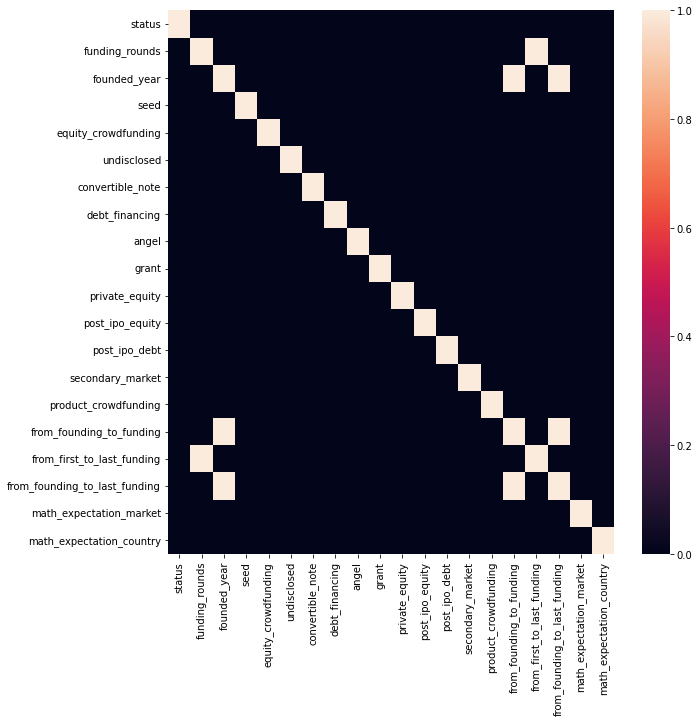

In [13]:
#SACAMOS UN HEATMAP DE LA CORRELACION LINEAL ENTRE VARIABLES NUMERICAS

fig, ax = plt.subplots(figsize=(10,10))  
umb= 0.5
sns.heatmap((df_transformed.corr() < -umb).astype(int) + (df_transformed.corr() > umb).astype(int))


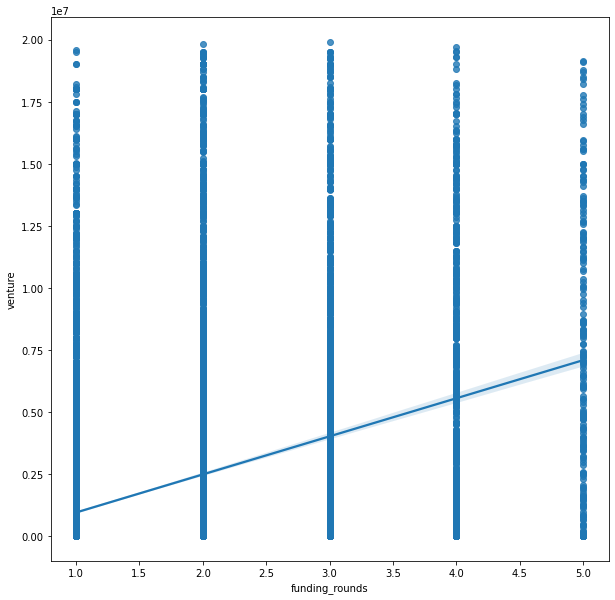

In [14]:
#VEMOS VISUALMENTE LA RELACION ENTRE EL NUMERO DE RONDAS DE FINANCIACION Y EL TOTAL DE FINANCIACION LEVANTADO
fig, ax = plt.subplots(figsize=(10,10))  
sns.regplot(data = df_clean,
           x = 'funding_rounds', y= 'venture');

#### 3.3 Matriz de PHIK. Correlacion, Significance y Outliers

interval columns not set, guessing: ['status', 'funding_rounds', 'founded_year', 'seed', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'from_founding_to_funding', 'from_first_to_last_funding', 'from_founding_to_last_funding', 'math_expectation_market', 'math_expectation_country']
interval columns not set, guessing: ['status', 'funding_rounds', 'founded_year', 'seed', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'from_founding_to_funding', 'from_first_to_last_funding', 'from_founding_to_last_funding', 'math_expectation_market', 'math_expectation_country']


<AxesSubplot:>

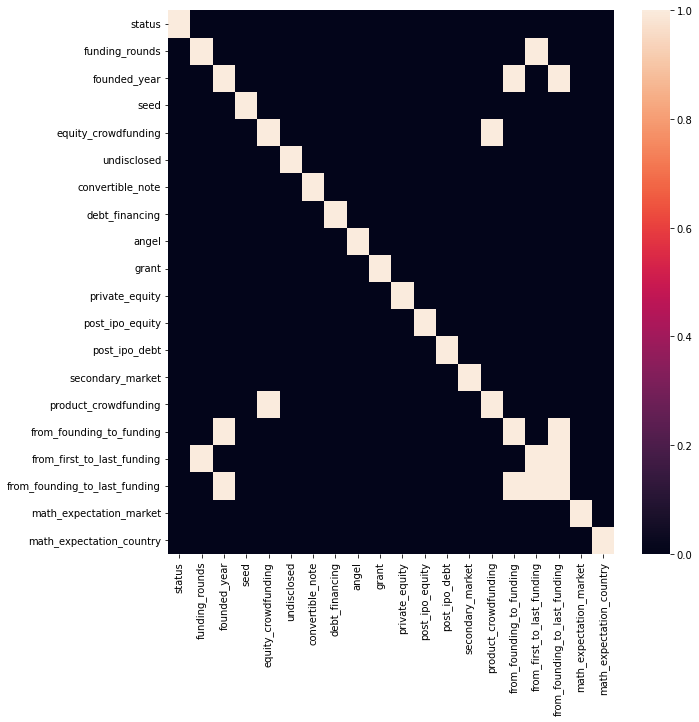

In [15]:
#HACEMOS UN HEATMAP CON LOS RESULTADOS DE LA MATRIZ DE PHIK CON VARIABLES NUMERICAS
fig, ax = plt.subplots(figsize=(10,10))  
umb= 0.5

sns.heatmap((df_transformed.phik_matrix() < -umb).astype(int) + (df_transformed.phik_matrix() > umb).astype(int))

interval columns not set, guessing: ['funding_rounds', 'seed', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'round_A', 'round_B', 'funding_total']
interval columns not set, guessing: ['funding_rounds', 'seed', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'round_A', 'round_B', 'funding_total']


<AxesSubplot:>

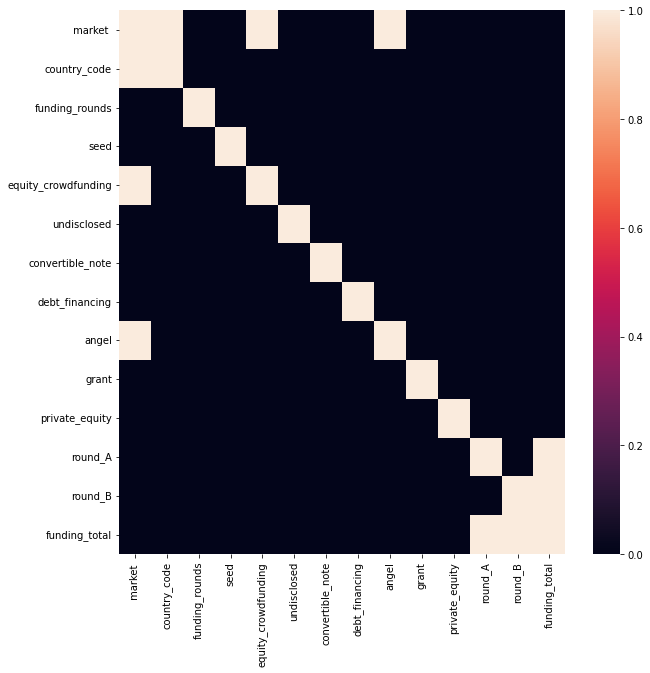

In [16]:
#MATRIZ DE PHIK CON CATEGORICAS Y NUMERICAS
X_todo_cat_num = df_clean[[' market ',
       'country_code',
       'funding_rounds', 'seed', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'round_A',
       'round_B', 'funding_total']]
#X_todo_cat_num.phik_matrix()

#HACEMOS UN HEATMAP CON LOS RESULTADOS DE LA MATRIZ DE PHIK
fig, ax = plt.subplots(figsize=(10,10))  
umb= 0.5

sns.heatmap((X_todo_cat_num.phik_matrix() < -umb).astype(int) + (X_todo_cat_num.phik_matrix() > umb).astype(int))

In [43]:
#SACAMOS LA SIGNIFICANCE MATRIX DE PHIK ENTRE VARIABLES CATEGORICAS Y NUMERICAS
X_todo_cat_num.significance_matrix()

interval columns not set, guessing: ['funding_rounds', 'seed', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'round_A', 'round_B', 'funding_total']


,market,country_code,funding_rounds,seed,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,round_A,round_B,funding_total
market,260.989019,15.320261,6.856599,6.117997,3.518053,2.532643,0.574566,-1.244433,4.728826,0.254368,0.361226,1.217887,-0.663825,6.710041
country_code,15.320261,227.070424,2.942540,4.695535,-0.992295,2.327295,-2.290628,3.138425,-0.560913,-0.326653,0.774302,0.243504,0.714094,11.166435
funding_rounds,6.856599,2.942540,162.958800,22.247597,-1.131294,3.277871,7.515042,13.687221,12.859492,3.891171,1.390669,18.485320,8.609795,43.181699
seed,6.117997,4.695535,22.247597,160.208080,0.087366,-1.448465,0.233164,2.646879,0.050291,0.433749,-1.653168,6.140759,0.051679,106.244022
equity_crowdfunding,3.518053,-0.992295,-1.131294,0.087366,30.010688,-0.953307,-1.204178,-1.491605,0.591763,-1.009081,-0.987257,-1.963229,0.566370,8.063913
undisclosed,2.532643,2.327295,3.277871,-1.448465,-0.953307,35.899288,0.762229,-1.534099,-2.454403,-1.265696,-1.376341,-2.008773,0.442922,12.099148
convertible_note,0.574566,-2.290628,7.515042,0.233164,-1.204178,0.762229,37.990123,-0.679107,1.336044,-1.408347,-1.566801,1.515827,-2.187129,9.740736
debt_financing,-1.244433,3.138425,13.687221,2.646879,-1.491605,-1.534099,-0.679107,71.378953,1.223620,-1.718357,0.480122,-2.237040,-0.461657,28.102847
angel,4.728826,-0.560913,12.859492,0.050291,0.591763,-2.454403,1.336044,1.223620,90.439200,0.722926,-1.695430,-0.126022,-1.244048,42.797771
grant,0.254368,-0.326653,3.891171,0.433749,-1.009081,-1.265696,-1.408347,-1.718357,0.722926,35.070562,2.913080,-1.833299,-0.364393,11.754448


interval columns not set, guessing: ['funding_rounds', 'seed', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'round_A', 'round_B', 'funding_total']
interval columns not set, guessing: ['funding_rounds', 'seed', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'round_A', 'round_B', 'funding_total']


<AxesSubplot:>

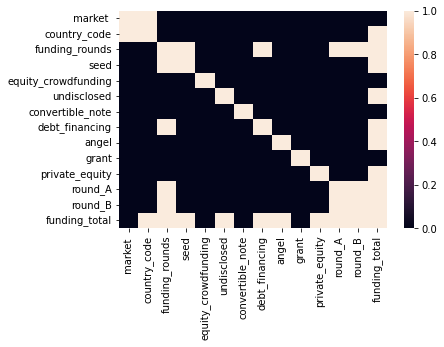

In [17]:
#representamos graficamente la significance matrix de Phik
umb= 10

sns.heatmap((X_todo_cat_num.significance_matrix() < -umb).astype(int) + (X_todo_cat_num.significance_matrix() > umb).astype(int))

#### 3.4 Feature Importance
##### 3.4.1 Random Forest

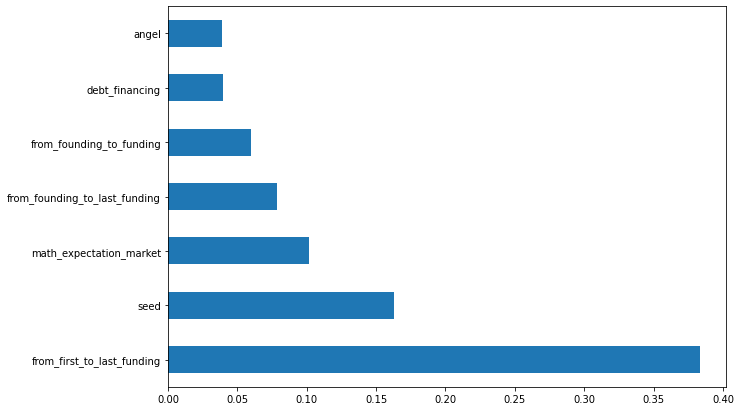

In [18]:
# FEATURE IMPORTANCE CON RANDOM FOREST
model_RFR = RandomForestRegressor(max_depth=10)
model_RFR.fit(X_train, y_train)

plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = df_transformed.columns)
feat_importances.nlargest(7).plot(kind='barh');

##### 3.4.2 Linear Regression

Feature: 0, Score: 1.58482
Feature: 1, Score: 317.62912
Feature: 2, Score: 116.20184
Feature: 3, Score: -0.48469
Feature: 4, Score: -0.50050
Feature: 5, Score: -0.27494
Feature: 6, Score: -0.45049
Feature: 7, Score: -0.26999
Feature: 8, Score: -0.65216
Feature: 9, Score: -0.36147
Feature: 10, Score: -0.21890
Feature: 11, Score: -0.20646
Feature: 12, Score: -0.51621
Feature: 13, Score: -0.19210
Feature: 14, Score: 0.01558
Feature: 15, Score: -2924.44484
Feature: 16, Score: -2924.44484
Feature: 17, Score: 2924.44484
Feature: 18, Score: 5664.68007
Feature: 19, Score: 8112.65309


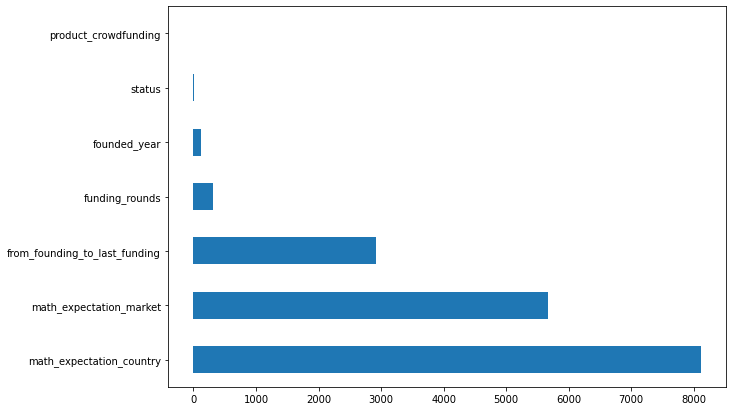

In [19]:
# FEATURE IMPORTANCE CON LINEAR REGRESSION
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

plt.figure(figsize=(10,7))
feat_importances_LR = pd.Series(model_LR.coef_, index = df_transformed.columns)
feat_importances_LR.nlargest(7).plot(kind='barh');

# get importance
importance = model_LR.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


##### 3.4.3 SelectKBest

In [20]:

#UTILIZAMOS LA FUNCION SELECTKBEST PARA ELEGIR LAS MEJORES COLUMNAS
X_skb = df_clean[['status',
       'funding_rounds', 'founded_year', 'seed',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'from_founding_to_funding',
       'from_first_to_last_funding', 'from_founding_to_last_funding','math_expectation_market',
       'math_expectation_country']]
y_skb = df_clean['venture']

#X_array = X_skb.to_numpy()

#SEPARAMOS X E y EN TRAIN Y TEST
X_train_skb, X_test_skb, y_train_skb, y_test_skb = train_test_split(X_skb, y_skb, test_size= size, random_state=seed)
select = SelectKBest(chi2, k=7)

Xy_new = select.fit_transform(X_train_skb, y_train_skb)


#Xy_new = pd.DataFrame(Xy_new, columns= Xy_new.columns)
print(Xy_new.shape)
print(X_skb.shape)
filter = select.get_support()
features = X_skb.columns

print('All features:', features)
print('Selected features: ', features[filter])

(15679, 7)
(19599, 20)
All features: Index(['status', 'funding_rounds', 'founded_year', 'seed',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding',
       'from_founding_to_funding', 'from_first_to_last_funding',
       'from_founding_to_last_funding', 'math_expectation_market',
       'math_expectation_country'],
      dtype='object')
Selected features:  Index(['undisclosed', 'debt_financing', 'post_ipo_equity', 'post_ipo_debt',
       'from_founding_to_funding', 'from_first_to_last_funding',
       'from_founding_to_last_funding'],
      dtype='object')


##### 3.4.4 Analisis fde los resultados

In [21]:
#ANALIZAMOS LAS DIFERENTES FEATURE IMPORTANCE QUE HEMOS OBTENIDO
list_features = []

list_features_skb = []
for i in features[filter]:
    list_features_skb.append(i)
    list_features.append(i)

list_features_rf = []
for i in feat_importances.nlargest(7).index:
    list_features_rf.append(i)
    list_features.append(i)

list_features_lr = []
for i in feat_importances_LR.nlargest(7).index:
    list_features_lr.append(i)
    list_features.append(i)

print('Feature Importance SKB: ', list_features_skb)
print('Feature Importance RF: ', list_features_rf)
print('Feature Importance LR: ', list_features_lr)

dicc_FI = {
'FI_SKB':  list_features_skb,
'FI_RF':  list_features_rf,
'FI_LR':  list_features_lr
}
set_features = set(list_features)

df_feature_importance = pd.DataFrame(data= dicc_FI)
display(df_feature_importance)
list_features_unique = list(set_features)
print(list_features_unique)
len(set_features)

Feature Importance SKB:  ['undisclosed', 'debt_financing', 'post_ipo_equity', 'post_ipo_debt', 'from_founding_to_funding', 'from_first_to_last_funding', 'from_founding_to_last_funding']
Feature Importance RF:  ['from_first_to_last_funding', 'seed', 'math_expectation_market', 'from_founding_to_last_funding', 'from_founding_to_funding', 'debt_financing', 'angel']
Feature Importance LR:  ['math_expectation_country', 'math_expectation_market', 'from_founding_to_last_funding', 'funding_rounds', 'founded_year', 'status', 'product_crowdfunding']


,FI_SKB,FI_RF,FI_LR
0,undisclosed,from_first_to_last_funding,math_expectation_country
1,debt_financing,seed,math_expectation_market
2,post_ipo_equity,math_expectation_market,from_founding_to_last_funding
3,post_ipo_debt,from_founding_to_last_funding,funding_rounds
4,from_founding_to_funding,from_founding_to_funding,founded_year
5,from_first_to_last_funding,debt_financing,status
6,from_founding_to_last_funding,angel,product_crowdfunding


['math_expectation_market', 'post_ipo_equity', 'post_ipo_debt', 'product_crowdfunding', 'angel', 'from_founding_to_last_funding', 'from_founding_to_funding', 'undisclosed', 'from_first_to_last_funding', 'math_expectation_country', 'funding_rounds', 'seed', 'founded_year', 'debt_financing', 'status']


15

### 4. Modelos Regresion


#### 4.1 Diccionario de Regresores

In [22]:
#DICCIONARIO DE REGRESSORS 
#CON EL CODIGO DE ALBERTO EN EL EJERCICIO DE CLASE DE FOOTBALL STATS
X = df_clean[list_features_unique]
y = df_clean['venture']

dictionary_model_reg = {
                        "poly_model": Pipeline([
                                        ("polynomial_features", PolynomialFeatures(degree=4)),
                                        ("Linear_regression", LinearRegression())]),
                        "linear_model": LinearRegression(),
                        "support_model": SVR(),
                        'random_forest': RandomForestRegressor(max_depth= 10, 
    min_samples_leaf= 1, 
    min_samples_split= 7, 
    n_estimators= 300)}


def train_model_reg(dict_model, X, y):
    dict_scores = {"model":[], "score":[]}
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state= seed)
    print(X_train.shape, y_train.shape)
    
    '''
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    
    
    print(scaler.fit(X))
    print(scaler.mean_)
    print(scaler.transform(X))
    '''
    for k,v in dictionary_model_reg.items():         
        v.fit(X_train, y_train)
        y_pred = v.predict(X_train)

        score = r2_score(y_train, y_pred)
   
        lista_val = [k, score]
        for i,e in enumerate(["model", "score"]):
            dict_scores[e].append(lista_val[i])

        X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
        plt.scatter(X_train_to_show, y_train_to_show, color='lightblue')
        X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
        plt.plot(X_train_to_show, y_pred, color='blue')
        plt.title(f"{k}")
        plt.show()
        
    return pd.DataFrame(dict_scores)


(15679, 15) (15679,)


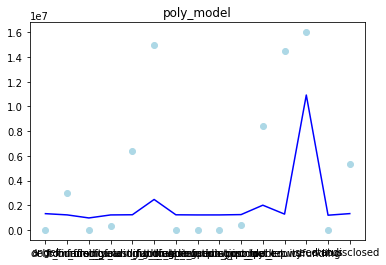

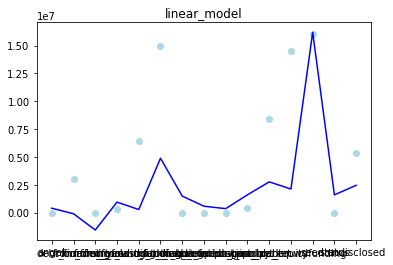

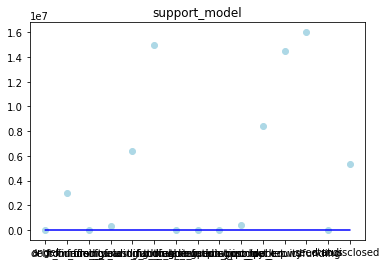

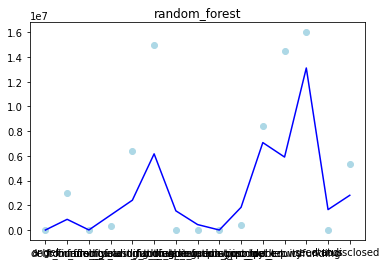

,model,score
0,poly_model,-0.951368
1,linear_model,0.235499
2,support_model,-0.239797
3,random_forest,0.507723


In [23]:
#EJECUTAMOS LA FUNCION 
train_model_reg(dictionary_model_reg, X, y)

#### 2.7 Regresion con Red Neuronal

In [ ]:
import keras as kb
from keras import layers
import tensorflow as tf

X = df_clean[list_features_unique]
y = df_clean['venture']

X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                              y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model_rn = keras.Sequential([
    keras.layers.Dense(35, activation= 'relu', input_shape= X_train.shape[1:]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1000, activation= 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(500, activation= 'relu'),
    keras.layers.Dense(1)
])

model_rn.compile(
    optimizer = 'Adam',
    metrics = ['mean_absolute_error'],
    loss = 'mean_absolute_error'
)

history = model_rn.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=20,
    validation_data=(X_valid, y_valid)
)

mse_test = model_rn.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
X_new = scaler.inverse_transform(X_new)
y_pred = model_rn.predict(X_new)

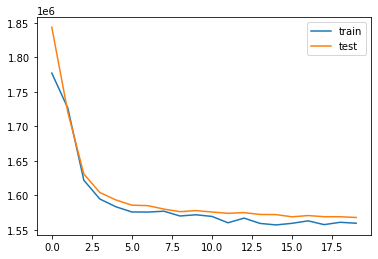

In [35]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [39]:

new_startups_data = scaler.inverse_transform(X_test[:20])
df_new_pred = pd.DataFrame(data=new_startups_data , columns= X.columns)
df_new_pred

,from_founding_to_last_funding,founded_year,funding_rounds,seed,undisclosed,from_founding_to_funding,from_first_to_last_funding,math_expectation_country,product_crowdfunding,status,post_ipo_equity,math_expectation_market,angel,post_ipo_debt,debt_financing
0,6.341760e+16,2010.0,1.0,325000.0,0.0,6.341760e+16,0.000000e+00,77.650555,0.0,1.0,0.0,56.400000,0.0,0.0,0.0
1,3.153600e+16,2006.0,1.0,1107075.0,0.0,3.153600e+16,0.000000e+00,0.000000,0.0,0.0,0.0,93.734348,0.0,0.0,0.0
2,1.563840e+17,2007.0,3.0,0.0,0.0,7.084800e+16,8.553600e+16,119.306251,0.0,1.0,0.0,69.047967,0.0,0.0,0.0
3,1.252800e+17,2006.0,1.0,0.0,0.0,1.252800e+17,0.000000e+00,119.306251,0.0,1.0,0.0,69.047967,0.0,0.0,0.0
4,7.776000e+15,2005.0,1.0,0.0,0.0,7.776000e+15,0.000000e+00,12.644516,0.0,2.0,0.0,0.000000,0.0,0.0,0.0
5,4.224960e+16,2008.0,2.0,140000.0,0.0,0.000000e+00,4.224960e+16,0.000000,0.0,1.0,0.0,587.970000,399450.0,0.0,0.0
6,5.261760e+16,2012.0,1.0,400000.0,0.0,5.261760e+16,0.000000e+00,32.395041,0.0,1.0,0.0,114.168932,0.0,0.0,0.0
7,1.728000e+15,2012.0,1.0,200000.0,0.0,1.728000e+15,0.000000e+00,119.306251,0.0,0.0,0.0,61.659775,0.0,0.0,0.0
8,0.000000e+00,2006.0,1.0,183687.0,0.0,0.000000e+00,0.000000e+00,79.546891,0.0,1.0,0.0,134.502941,0.0,0.0,0.0
9,4.605120e+16,2013.0,1.0,0.0,0.0,4.605120e+16,0.000000e+00,40.831250,0.0,1.0,0.0,95.681813,0.0,0.0,0.0


# PREDICCIONES REGRESION

In [71]:
#actual_venture = list(y_test[:20])
new_startups_scaled = X_test[:20]

In [53]:
#new_startups_data = scaler.inverse_transform(X_test[:20])
predict_RFR = model_RFR.predict(X_test[:20])
df_new_pred['predicted_RandForest'] = predict_RFR

predict_RN = model_rn.predict(X_test[:20])
df_new_pred['predicted_NeuralNetwork'] = predict_RN
df_new_pred['actual_venture'] = y_test[:20]
df_new_pred['diff_pred_actual_RF'] = df_new_pred['predicted_RandForest'] - df_new_pred['actual_venture']
df_new_pred['diff_pred_actual_NN'] = df_new_pred['predicted_NeuralNetwork'] - df_new_pred['actual_venture']
df_new_pred

,from_founding_to_last_funding,founded_year,funding_rounds,seed,undisclosed,from_founding_to_funding,from_first_to_last_funding,math_expectation_country,product_crowdfunding,status,post_ipo_equity,math_expectation_market,angel,post_ipo_debt,debt_financing,predicted_RandForest,predicted_NeuralNetwork,actual_venture,diff_pred_actual_RF,diff_pred_actual_NN
0,6.341760e+16,2010.0,1.0,325000.0,0.0,6.341760e+16,0.000000e+00,77.650555,0.0,1.0,0.0,56.400000,0.0,0.0,0.0,1.965787e+06,1.972944e-01,0.0,1.965787e+06,1.972944e-01
1,3.153600e+16,2006.0,1.0,1107075.0,0.0,3.153600e+16,0.000000e+00,0.000000,0.0,0.0,0.0,93.734348,0.0,0.0,0.0,1.965787e+06,2.923777e-01,0.0,1.965787e+06,2.923777e-01
2,1.563840e+17,2007.0,3.0,0.0,0.0,7.084800e+16,8.553600e+16,119.306251,0.0,1.0,0.0,69.047967,0.0,0.0,0.0,1.967679e+06,4.558084e+06,6500000.0,-4.532321e+06,-1.941916e+06
3,1.252800e+17,2006.0,1.0,0.0,0.0,1.252800e+17,0.000000e+00,119.306251,0.0,1.0,0.0,69.047967,0.0,0.0,0.0,1.965787e+06,4.780959e+05,5000000.0,-3.034213e+06,-4.521904e+06
4,7.776000e+15,2005.0,1.0,0.0,0.0,7.776000e+15,0.000000e+00,12.644516,0.0,2.0,0.0,0.000000,0.0,0.0,0.0,1.781364e+06,2.359650e-01,64795.0,1.716569e+06,-6.479476e+04
5,4.224960e+16,2008.0,2.0,140000.0,0.0,0.000000e+00,4.224960e+16,0.000000,0.0,1.0,0.0,587.970000,399450.0,0.0,0.0,1.965787e+06,3.672479e+05,0.0,1.965787e+06,3.672479e+05
6,5.261760e+16,2012.0,1.0,400000.0,0.0,5.261760e+16,0.000000e+00,32.395041,0.0,1.0,0.0,114.168932,0.0,0.0,0.0,1.965787e+06,2.254927e-01,0.0,1.965787e+06,2.254927e-01
7,1.728000e+15,2012.0,1.0,200000.0,0.0,1.728000e+15,0.000000e+00,119.306251,0.0,0.0,0.0,61.659775,0.0,0.0,0.0,1.965787e+06,2.563784e-01,0.0,1.965787e+06,2.563784e-01
8,0.000000e+00,2006.0,1.0,183687.0,0.0,0.000000e+00,0.000000e+00,79.546891,0.0,1.0,0.0,134.502941,0.0,0.0,0.0,1.965787e+06,2.202637e-01,0.0,1.965787e+06,2.202637e-01
9,4.605120e+16,2013.0,1.0,0.0,0.0,4.605120e+16,0.000000e+00,40.831250,0.0,1.0,0.0,95.681813,0.0,0.0,0.0,1.965787e+06,2.148191e-01,2000000.0,-3.421342e+04,-2.000000e+06


In [57]:
list(df_new_pred['predicted_NeuralNetwork'])

[0.1972944140434265,
 0.29237765073776245,
 4558084.0,
 478095.90625,
 0.23596495389938354,
 367247.875,
 0.2254926562309265,
 0.2563783526420593,
 0.22026365995407104,
 0.21481913328170776,
 0.18038147687911987,
 100630.6484375,
 3419121.0,
 5514424.0,
 0.2266818881034851,
 0.2884637713432312,
 0.21467512845993042,
 0.1948968768119812,
 0.1924077868461609,
 0.25700587034225464]

### 5. MODELOS CLASIFICACION


In [62]:
#LIBRERIAS
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import KFold

try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed")
    xgboost = None


#### 5.1 Generamos una columna sintetica para poder clasificar las startups


In [63]:
#GENERAMOS UNA COLUMNA SINTETICA CON EL GRADO DE ATRACTIVO PARA INVERTIR EN UNA STARTUP
# LOW: VENTURE FUNDING < 50000
# MED: VENTURE FUNDING >= 50000 & < 2000000
# HIGH: VENTURE FUNDING >= 2000000

venture_funding = df_clean[df_clean['venture'] > 0]
venture_funding.sort_values(by= 'venture', inplace=True)
venture_funding['venture'][:50]
len(venture_funding)

venture_interest_low = df_clean[df_clean['venture'] < 50000]
venture_interest_med = df_clean[(df_clean['venture'] >= 50000) & (df_clean['venture'] < 2000000)]
venture_interest_high = df_clean[df_clean['venture'] >= 2000000]

print('Total startups on dataset clean: ', len(df_clean))
print('Startups uninteresting: ', len(venture_interest_low))
print('Startups that might be interesting: ', len(venture_interest_med))
print('Startups really attractive: ', len(venture_interest_high))

bin_labels= labels=[0, 1, 2]
df_clean['attractiveness'] = pd.cut(x=df_clean['venture'], bins=[-1,50000,2000000,40305028],labels=bin_labels)

df_clean.head()

Total startups on dataset clean:  19599
Startups uninteresting:  12151
Startups that might be interesting:  2762
Startups really attractive:  4686


,permalink,name,homepage_url,category_list,market,status,country_code,state_code,region,city,...,round_G,round_H,funding_total,from_founding_to_funding,from_first_to_last_funding,from_founding_to_last_funding,math_expectation_market,math_expectation_country,venture1,attractiveness
44370,/organization/trulysocial-apps,TrulySocial,http://www.trulysocialapps.com,|Mobile|Social Media|Online Dating|Games|,Social Media,1,GIB,NaN,GIB - Other,Gibraltar,...,0.0,0.0,1015000.0,70070400000000000,0,70070400000000000,61.659775,979.950000,-2.302585,0
47008,/organization/wave-crest-holdings,Wave Crest Group,http://www.wavecrest.gi,|Mobile Payments|Payments|Finance|,Mobile Payments,1,GIB,NaN,GIB - Other,Gibraltar,...,0.0,0.0,18929912.0,39744000000000000,41904000000000000,81648000000000000,195.990000,979.950000,16.756254,2
42463,/organization/tern,Tern,http://ternbicycles.com/tw,|Public Transportation|,Public Transportation,1,TWN,NaN,Taiwan,Taipei,...,0.0,0.0,4300000.0,85622400000000000,0,85622400000000000,59.390909,301.523077,-2.302585,0
36755,/organization/sanjet-technology,SanJet Technology,http://www.sanjetco.com,|Manufacturing|,Manufacturing,1,TWN,NaN,Taiwan,Hsinchu,...,0.0,0.0,0.0,144201600000000000,0,144201600000000000,98.487437,301.523077,-2.302585,0
34190,/organization/q-l-l-inc-ltd,Q.L.L.Inc. Ltd.,http://www.qll.co,|Language Learning|Entertainment|Apps|Education|,Education,1,TWN,NaN,Taiwan,Taipei,...,0.0,0.0,500000.0,133920000000000000,84499200000000000,218419200000000000,48.392593,301.523077,-2.302585,0


#### 5.2 NEURAL NETWORK

In [ ]:
#CREAMOS UNA RED NEURONAL DE CLASIFICACION CON 3 NEURONAS DE SALIDA
X = df_clean[list_features_unique]
y = df_clean['attractiveness']

X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                              y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model_rnc = keras.Sequential([
    keras.layers.Dense(100, activation= 'relu', input_shape= X_train.shape[1:]),
    keras.layers.Dense(100, activation= 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

model_rnc.compile(
    optimizer = 'Adam',
    metrics = ["accuracy"],
    loss = "sparse_categorical_crossentropy"
)

history = model_rnc.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=30,
    validation_data=(X_valid, y_valid)
)

mse_test = model_rnc.evaluate(X_test, y_test)
#X_new = X_test[:20] # pretend these are new instances
#y_pred = model_rn.predict(new_startups_scaled)
#y_pred

In [91]:
mse_test

[0.6439318656921387, 0.7195918560028076]

In [85]:

predict_RNC = model_rnc.predict(new_startups_scaled)
#df_new_pred['predicted_NeuralNetworkClass'] = predict_RNC
#df_new_pred['actual_venture'] = actual_venture
#df_new_pred['diff_pred_actual_RF'] = df_new_pred['predicted_RandForest'] - df_new_pred['actual_venture']
#df_new_pred['diff_pred_actual_NNC'] = df_new_pred['predicted_NeuralNetworkClass'] - df_new_pred['actual_venture']

df_NNC_pred = pd.DataFrame(predict_RNC, columns= ['Low Interest', 'Average Interest', 'High Interest'])

array([[9.99707878e-01, 1.87532831e-04, 1.04516897e-04],
       [9.99447048e-01, 1.88360267e-04, 3.64552659e-04],
       [3.33732106e-02, 1.73600227e-01, 7.93026567e-01],
       [2.25498438e-01, 4.35555816e-01, 3.38945746e-01],
       [7.07493544e-01, 1.77855670e-01, 1.14650734e-01],
       [9.44985390e-01, 1.99899413e-02, 3.50246243e-02],
       [9.99933839e-01, 4.10404864e-05, 2.51953461e-05],
       [9.93707240e-01, 5.21798711e-03, 1.07475591e-03],
       [9.93696034e-01, 3.44338920e-03, 2.86065717e-03],
       [6.54208064e-01, 1.64436594e-01, 1.81355387e-01],
       [9.98355687e-01, 5.41950576e-04, 1.10234693e-03],
       [6.07553005e-01, 2.48085499e-01, 1.44361511e-01],
       [1.11984648e-01, 1.82105154e-01, 7.05910146e-01],
       [1.46259386e-02, 2.48612344e-01, 7.36761689e-01],
       [8.11773956e-01, 8.56669769e-02, 1.02559038e-01],
       [9.99848723e-01, 3.57903045e-05, 1.15520612e-04],
       [8.22062433e-01, 1.24487780e-01, 5.34498096e-02],
       [3.15940648e-01, 2.66801

In [ ]:
#display(df_clean[(df_clean['math_expectation_market'] > 77.3) & (df_clean['math_expectation_market'] < 77.4) & (df_clean['country_code'] == 'USA') & (df_clean['funding_rounds'] == 1)])
#display(df_clean[(df_clean['math_expectation_market'] > 69) & (df_clean['math_expectation_market'] < 70) & (df_clean['country_code'] == 'USA') & (df_clean['funding_rounds'] == 1) & (df_clean['founded_year'] == 2006.0)])
#df_clean[(df_clean['math_expectation_market'] > 653) & (df_clean['math_expectation_market'] < 654) & (df_clean['country_code'] == 'USA') & (df_clean['funding_rounds'] == 2)](df_clean['math_expectation_country'] > 119) & (df_clean['math_expectation_country'] < 119.4)
#display(df_clean[(df_clean['math_expectation_market'] > 86) & (df_clean['math_expectation_market'] < 87) & (df_clean['country_code'] == 'USA') & (df_clean['funding_rounds'] == 0)])

#1 df_new_pred[2] Health&Wellness. USA. 3 Funding Rounds. 22996	/organization/knee-creations	Knee Creations	http://subchondroplasty.com	
#2 df_new_pred[3] Health&Wellness. USA. 1 Funding Rounds. 3677	/organization/attune-foods	Attune Foods	http://www.attunefoods.com
#3 df_new_pred[10] Automotive. USA, F1 funding rounds. 38748	/organization/skully-helmets	Skully Helmets	http://www.skullysystems.com/	
#4 E-Commerce. USA. 5 fundingrounds.


### 6. SHARKS AND DRAGONS ALGORITHM

In [138]:
df_sharks_and_dragons.columns

Index(['deal', 'description', 'entrepreneurs', 'location', 'askedFor',
       'exchangeForStake', 'valuation', 'title', 'Multiple Entreprenuers',
       'year', 'cat_Business Services', 'cat_Children/Education',
       'cat_Fashion/Beauty', 'cat_Fitness/Sports/Outdoors',
       'cat_Food and Beverage', 'cat_Green/CleanTech', 'cat_Health/Wellness',
       'cat_Lifestyle/Home', 'cat_Media/Entertainment', 'cat_Novelties',
       'cat_Pet Products', 'cat_Software/Tech', 'cat_Travel'],
      dtype='object')

<AxesSubplot:>

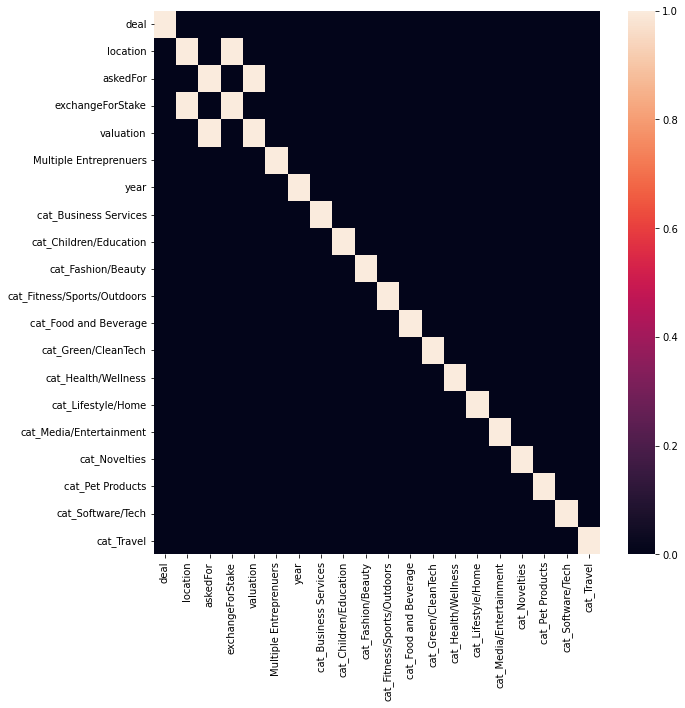

In [ ]:
#MATRIZ DE CORRELACION
fig, ax = plt.subplots(figsize=(10,10))  
umb= 0.5
sns.heatmap((df_sharks_and_dragons.corr() < -umb).astype(int) + (df_sharks_and_dragons.corr() > umb).astype(int))

<AxesSubplot:>

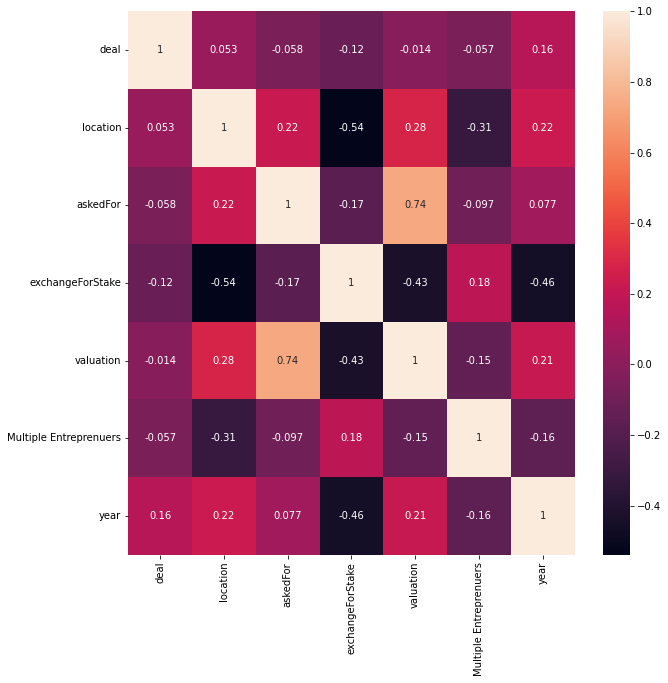

In [ ]:
matrix = df_sharks_and_dragons[['deal', 'location', 'askedFor',
       'exchangeForStake', 'valuation', 'Multiple Entreprenuers',
       'year']]

fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(matrix.corr(), annot=True)

In [139]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

In [155]:
#CREAMOS UNA RED NEURONAL DE CLASIFICACION CON 1 neurona DE SALIDA
X = df_sharks_and_dragons[['location', 'askedFor',
       'exchangeForStake', 'valuation', 'Multiple Entreprenuers',
       'year', 'cat_Business Services', 'cat_Children/Education',
       'cat_Fashion/Beauty', 'cat_Fitness/Sports/Outdoors',
       'cat_Food and Beverage', 'cat_Green/CleanTech', 'cat_Health/Wellness',
       'cat_Lifestyle/Home', 'cat_Media/Entertainment', 'cat_Novelties',
       'cat_Pet Products', 'cat_Software/Tech', 'cat_Travel']]
y = df_sharks_and_dragons['deal']

X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                              y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model_rn_SaD= keras.Sequential([
    keras.layers.Dense(35, activation= 'relu', input_shape= X_train.shape[1:]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1000, activation= 'relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_rn_SaD.compile(
    optimizer = 'Adam',
    metrics = ["accuracy"],
    loss = "binary_crossentropy"
)

history = model_rn_SaD.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_data=(X_valid, y_valid)
)

mse_test_SaD = model_rn_SaD.evaluate(X_test, y_test)
X_new_SaD = X_test[:20] # pretend these are new instances
y_pred_SaD = model_rn_SaD.predict(X_new_SaD)

Epoch 1/20
6/6 [==============================] - 1s 32ms/step - loss: 0.6925 - accuracy: 0.5437 - val_loss: 0.6832 - val_accuracy: 0.5938
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 0.6737 - accuracy: 0.5828 - val_loss: 0.6729 - val_accuracy: 0.6133
Epoch 3/20
6/6 [==============================] - 0s 8ms/step - loss: 0.6721 - accuracy: 0.6023 - val_loss: 0.6700 - val_accuracy: 0.5820
Epoch 4/20
6/6 [==============================] - 0s 8ms/step - loss: 0.6748 - accuracy: 0.5893 - val_loss: 0.6742 - val_accuracy: 0.5820
Epoch 5/20
6/6 [==============================] - 0s 8ms/step - loss: 0.6743 - accuracy: 0.5828 - val_loss: 0.6772 - val_accuracy: 0.6055
Epoch 6/20
6/6 [==============================] - 0s 9ms/step - loss: 0.6711 - accuracy: 0.5737 - val_loss: 0.6714 - val_accuracy: 0.5898
Epoch 7/20
6/6 [==============================] - 0s 9ms/step - loss: 0.6749 - accuracy: 0.5632 - val_loss: 0.6711 - val_accuracy: 0.5977
Epoch 8/20
6/6 [=================

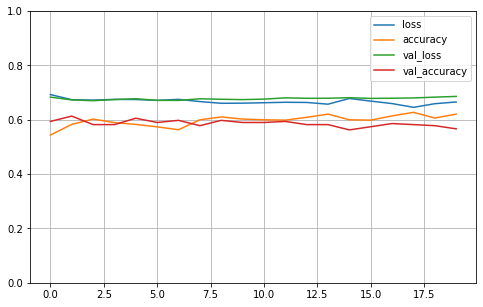

In [156]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [159]:
#df_new_pred[['Low Interest', 'Average Interest', 'High Interest']] = predict_RNC

df_new_pred['Sharks_and_Dragons'] = y_pred_SaD

In [152]:
'''
startup1_SaD = [1,100000.0,	15.0,	666667.0,	1,	2013.0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0] 
startup2_SaD = [1,200000.0,	10.0,	2000000.0,	1,	2013.0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0]
startup3_SaD = [1,80000.0,	20.0,	400000.0,	1,	2013.0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0]

print(mse_test_SaD)


pred_startup1_SaD = model_rn_SaD.predict(startup1_SaD)
pred_startup2_SaD = model_rn_SaD.predict(startup2_SaD)
pred_startup3_SaD = model_rn_SaD.predict(startup3_SaD)
'''

#### 7 Algoritmo Unico

In [168]:
#OPCION CON PESOS: REG=2, CLAS=2, S&D=1
#MAX SCORE: 5

''' CREAMOS NUESTRO ALGORITMO UNICO
y = a W + b W1 + c W2 + d W3 + e W4
predicted_NeuralNetwork	actual_venture	diff_pred_actual_NN	Low Interest	Average Interest	High Interest	Sharks_and_Dragons
DONDE: 
'''
a = df_new_pred['High Interest'] #high attractiveness ratio (in the neuronal network classifier)
b = df_new_pred['Average Interest'] #medium attractiveness ratio (in the neuronal network classifier)
c = df_new_pred['Low Interest'] #low attractiveness ratio (in the neuronal network classifier)
d = df_new_pred['predicted_NeuralNetwork'] #predicted funding value in USD (in the randomforest regressor algorithm)
e = df_new_pred['Sharks_and_Dragons'] #deal prediction (in the sharks_and_dragons algorithm)


#DECLARAMOS LOS PESOS W
W = 2
W1 = 1
W2 = 0.1
W3 = 0.0000005
W4 = 1

df_new_pred['Algoritmo_Unico'] = round((a * W) + (b* W1) + (c * W2) + (d * W3) + (e * W4), 2)

df_new_pred 

,from_founding_to_last_funding,founded_year,funding_rounds,seed,undisclosed,from_founding_to_funding,from_first_to_last_funding,math_expectation_country,product_crowdfunding,status,...,post_ipo_debt,debt_financing,predicted_NeuralNetwork,actual_venture,diff_pred_actual_NN,Low Interest,Average Interest,High Interest,Sharks_and_Dragons,Algoritmo_Unico
0,6.341760e+16,2010.0,1.0,325000.0,0.0,6.341760e+16,0.000000e+00,77.650555,0.0,1.0,...,0.0,0.0,1.972944e-01,0.0,1.972944e-01,0.999708,0.000188,0.000105,0.518695,0.62
1,3.153600e+16,2006.0,1.0,1107075.0,0.0,3.153600e+16,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,2.923777e-01,0.0,2.923777e-01,0.999447,0.000188,0.000365,0.535030,0.64
2,1.563840e+17,2007.0,3.0,0.0,0.0,7.084800e+16,8.553600e+16,119.306251,0.0,1.0,...,0.0,0.0,4.558084e+06,6500000.0,-1.941916e+06,0.033373,0.173600,0.793027,0.397517,4.44
3,1.252800e+17,2006.0,1.0,0.0,0.0,1.252800e+17,0.000000e+00,119.306251,0.0,1.0,...,0.0,0.0,4.780959e+05,5000000.0,-4.521904e+06,0.225498,0.435556,0.338946,0.692109,2.07
4,7.776000e+15,2005.0,1.0,0.0,0.0,7.776000e+15,0.000000e+00,12.644516,0.0,2.0,...,0.0,0.0,2.359650e-01,64795.0,-6.479476e+04,0.707494,0.177856,0.114651,0.631560,1.11
5,4.224960e+16,2008.0,2.0,140000.0,0.0,0.000000e+00,4.224960e+16,0.000000,0.0,1.0,...,0.0,0.0,3.672479e+05,0.0,3.672479e+05,0.944985,0.019990,0.035025,0.601084,0.97
6,5.261760e+16,2012.0,1.0,400000.0,0.0,5.261760e+16,0.000000e+00,32.395041,0.0,1.0,...,0.0,0.0,2.254927e-01,0.0,2.254927e-01,0.999934,0.000041,0.000025,0.618361,0.72
7,1.728000e+15,2012.0,1.0,200000.0,0.0,1.728000e+15,0.000000e+00,119.306251,0.0,0.0,...,0.0,0.0,2.563784e-01,0.0,2.563784e-01,0.993707,0.005218,0.001075,0.625371,0.73
8,0.000000e+00,2006.0,1.0,183687.0,0.0,0.000000e+00,0.000000e+00,79.546891,0.0,1.0,...,0.0,0.0,2.202637e-01,0.0,2.202637e-01,0.993696,0.003443,0.002861,0.545289,0.65
9,4.605120e+16,2013.0,1.0,0.0,0.0,4.605120e+16,0.000000e+00,40.831250,0.0,1.0,...,0.0,0.0,2.148191e-01,2000000.0,-2.000000e+06,0.654208,0.164437,0.181355,0.371615,0.96
